# BANK MARKETING SUCCESS PREDICTION USING RANDOM FOREST CLASSIFIER

In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv("C:/Users/HP/Downloads/bank-marketing.csv")

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


### Conclusion:
#### 1.There is no null values in the given dataset
#### 2.Data is either of integer type or object type
# ************************************************************

In [6]:
df.describe()#obtaining the mathematical info about the continuous features

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.nunique()#no of unique values in each columns

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [8]:
#printing the unique values of each columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print("__________________________________________________________________________________________________")

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
__________________________________________________________________________________________________
marital
['married' 'single' 'divorced']
__________________________________________________________________________________________________
education
['tertiary' 'secondary' 'unknown' 'primary']
__________________________________________________________________________________________________
targeted
['yes' 'no']
__________________________________________________________________________________________________
default
['no' 'yes']
__________________________________________________________________________________________________
housing
['yes' 'no']
__________________________________________________________________________________________________
loan
['no' 'yes']
___________________________________________________________________________

In [9]:
#taking all the categorical features to visualise data distribution 
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['response']))]
categorical_features

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

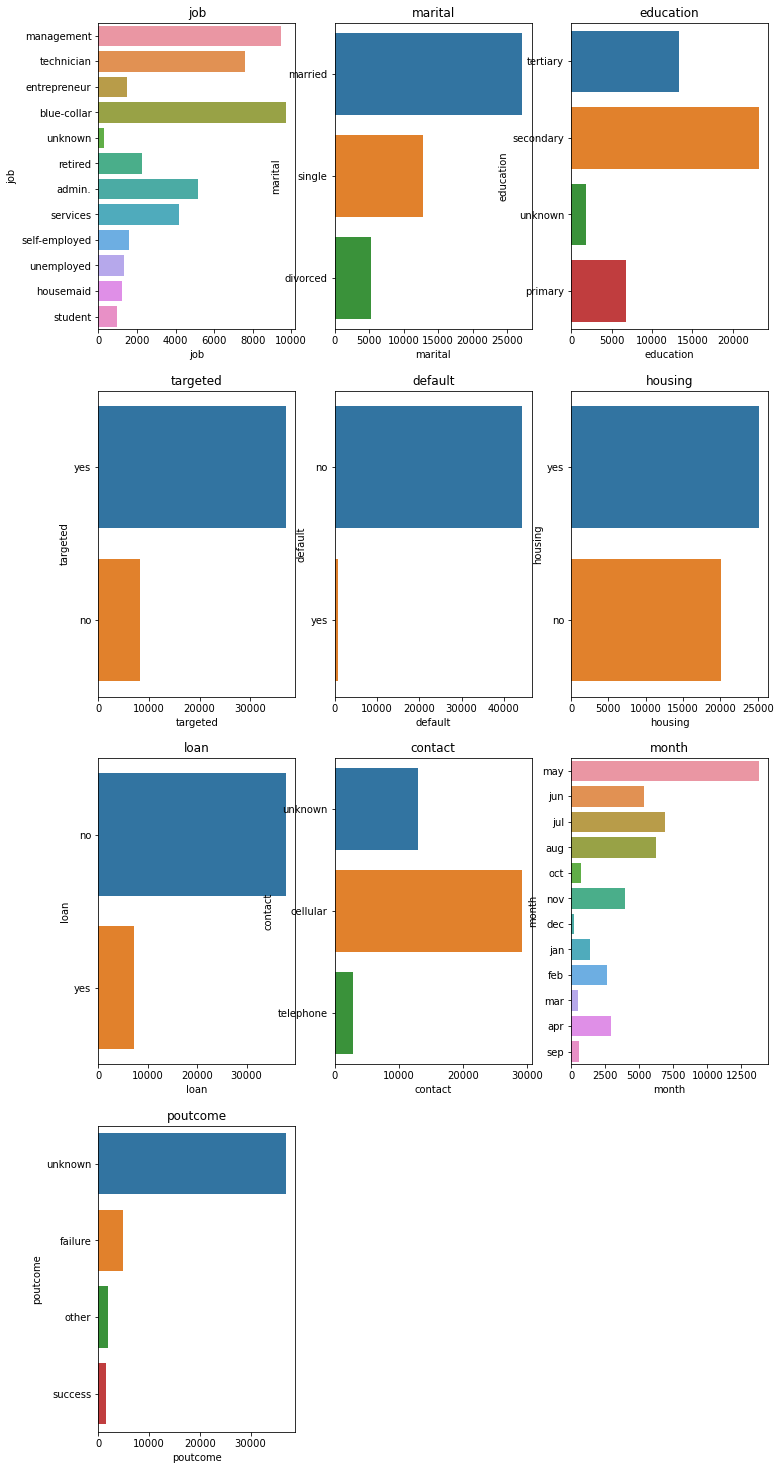

In [10]:
plt.figure(figsize=(12,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Conclusion:
#### 1.In the given dataset ,majority of the data is of customers having job profile of either management ,technician or blue-collar 
#### 2.Most of the data in the given dataset is of Married customers
#### 3.Most of the customers in the data have persued secondary or tertiary education
#### 4.Most of the customers in the dataset are targeted
#### 5.Almost every cutomer in the datset are not defaulters
#### 6.Most of the cutomers don't  have a existing loan
#### 7.Most of the cutomers were contacted via cellphones
#### 8.Most of the advertisement is done in the month of may
# ************************************************************************

In [11]:
#count of each features values based on response
for categorical_feature in categorical_features:
    print(df.groupby(['response',categorical_feature]).size())
    print("____________________________________________________________________________")

response  job          
no        admin.           4540
          blue-collar      9024
          entrepreneur     1364
          housemaid        1131
          management       8157
          retired          1748
          self-employed    1392
          services         3785
          student           669
          technician       6757
          unemployed       1101
          unknown           254
yes       admin.            631
          blue-collar       708
          entrepreneur      123
          housemaid         109
          management       1301
          retired           516
          self-employed     187
          services          369
          student           269
          technician        840
          unemployed        202
          unknown            34
dtype: int64
____________________________________________________________________________
response  marital 
no        divorced     4585
          married     24459
          single      10878
yes       divor

In [12]:
#checking for value count in "default" column as the visualisation showed almost every row had same value of "default" 
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

### Conclusion:
#### Almost every row has same value of default,so it won't make any difference,so it can be dropped 

In [13]:
df=df.drop(["default"],axis=1)#dropping the default column

In [14]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.shape

(45211, 18)

### Conclusion:
#### The column has been dropped
# ****************************************************************

In [16]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Conclusion
#### "poutcome" also has almost same value in almost every row.so it can be dropped

In [17]:
df=df.drop(["poutcome"],axis=1)

In [18]:
df.shape

(45211, 17)

In [19]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,yes,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,60000,single,secondary,yes,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,120000,married,secondary,yes,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,20000,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,0,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


### Conclusions:
#### The "poutcome" column has been dropped
# *****************************************************************************************

In [20]:
print(df.pdays.value_counts())#distinct value count in "pdays" column

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64


### Conclusion:
#### "pdays" column is having unusual values -1

In [21]:
print(df.pdays.describe())#mathematical analysis of "pdays" column

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [22]:
df_rel = df[df.pdays != -1]#removing the unusual values of pdays column

In [23]:
df_rel.pdays.describe()#mathematical analysis of relevant values of pdyas column

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Text(0.5, 1.0, 'Without filtering')


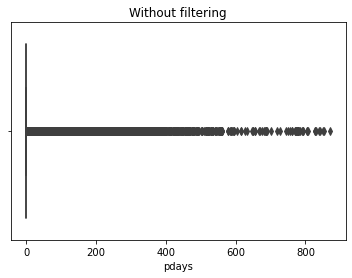

In [24]:
print(sns.boxplot(x=df['pdays']).set_title('Without filtering'))

Text(0.5, 1.0, 'With filtering')


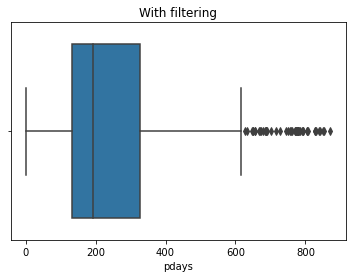

In [25]:
print(sns.boxplot(x=df_rel['pdays']).set_title('With filtering'))

### Conclusion:
#### value of pdays> 600 are outliers and there are many outliers ,so we cant remove them 
## ************************************************************************************

In [26]:
import warnings#to avoid any kind of warnings
warnings.filterwarnings('ignore')

In [27]:
num_var=list(df.select_dtypes(exclude='object').columns)#creating a separate dataframe for non categorical values
df[num_var]

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3
45209,57,20000,668,17,508,4,-1,0


In [28]:
cat_var=list(df.select_dtypes(exclude=[np.number]).columns)#creating a separate dataframe for  categorical values
df[cat_var]

,job,marital,education,targeted,housing,loan,contact,month,response
0,management,married,tertiary,yes,yes,no,unknown,may,no
1,technician,single,secondary,yes,yes,no,unknown,may,no
2,entrepreneur,married,secondary,yes,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,yes,no,no,cellular,nov,yes
45207,retired,divorced,primary,yes,no,no,cellular,nov,yes
45208,retired,married,secondary,yes,no,no,cellular,nov,yes
45209,blue-collar,married,secondary,yes,no,no,telephone,nov,no


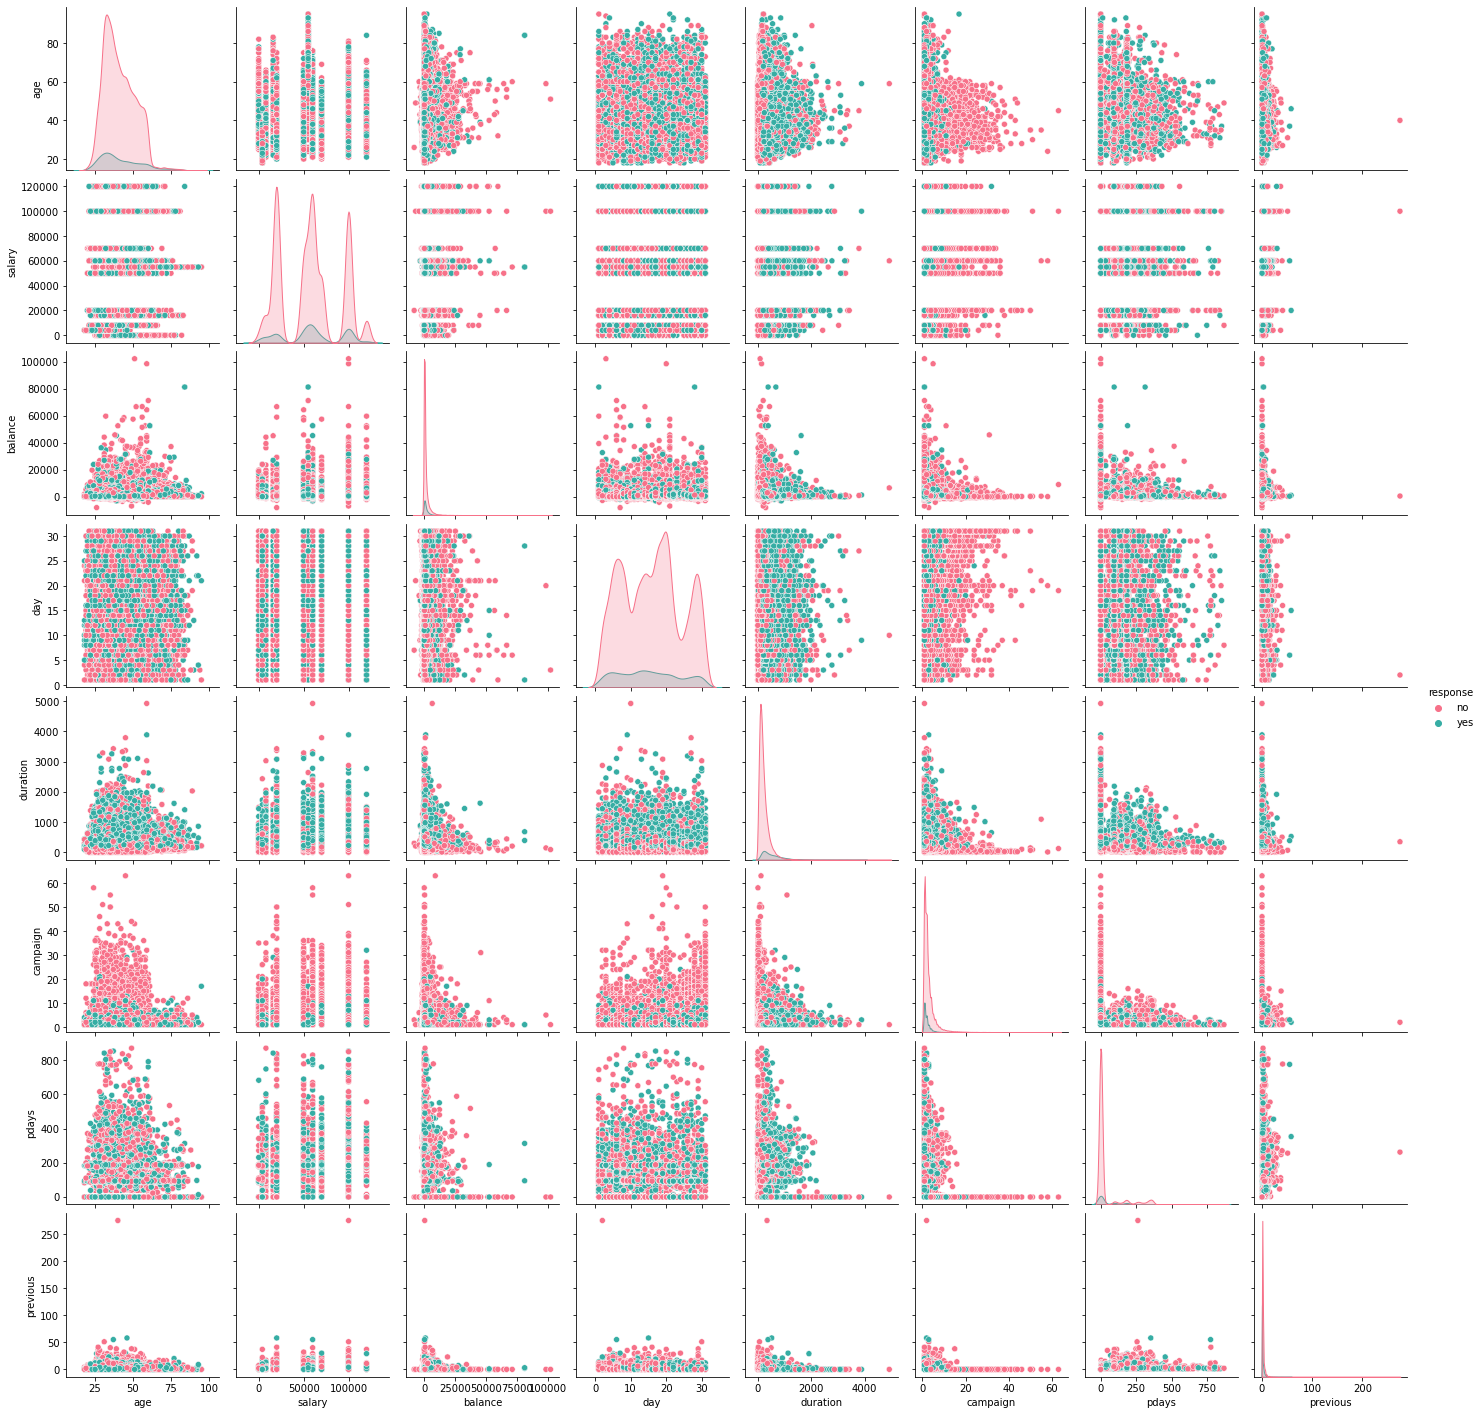

In [29]:
sns.pairplot(df, hue='response', palette="husl")#pairplot of non categorical data based on response of the customers

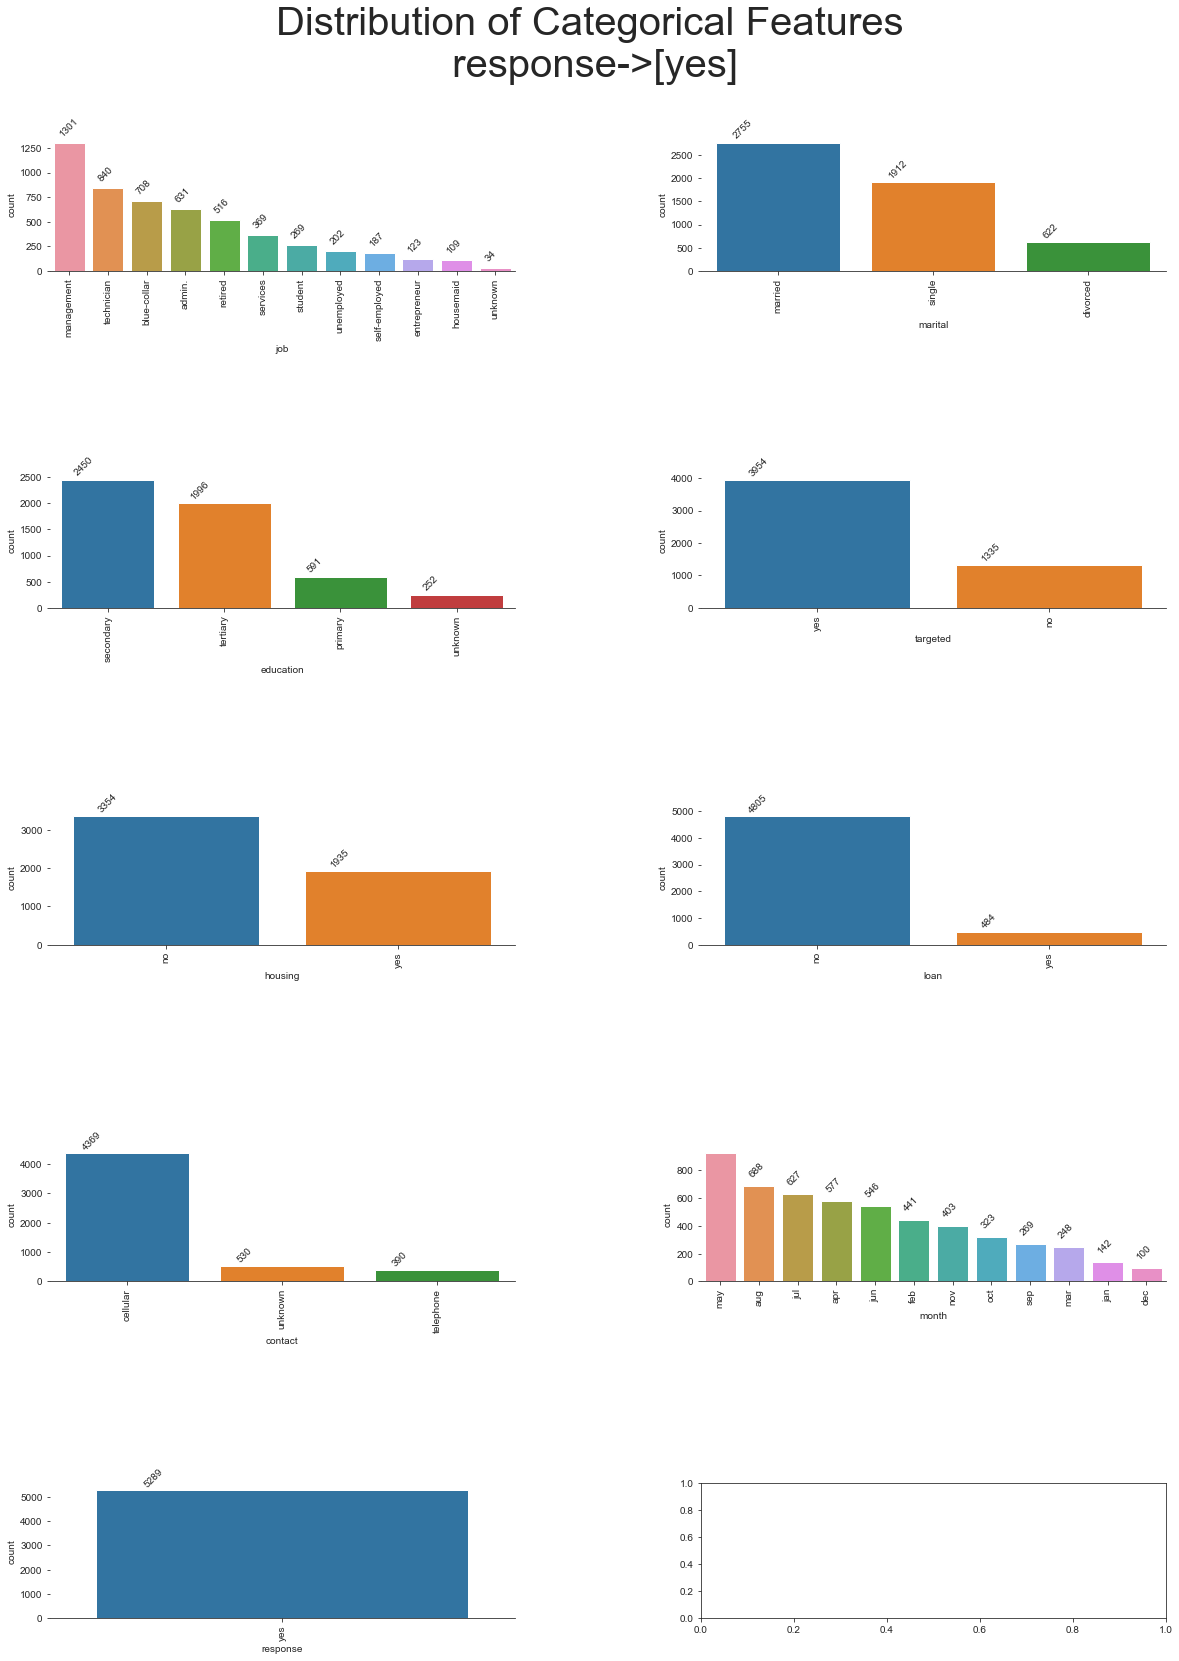

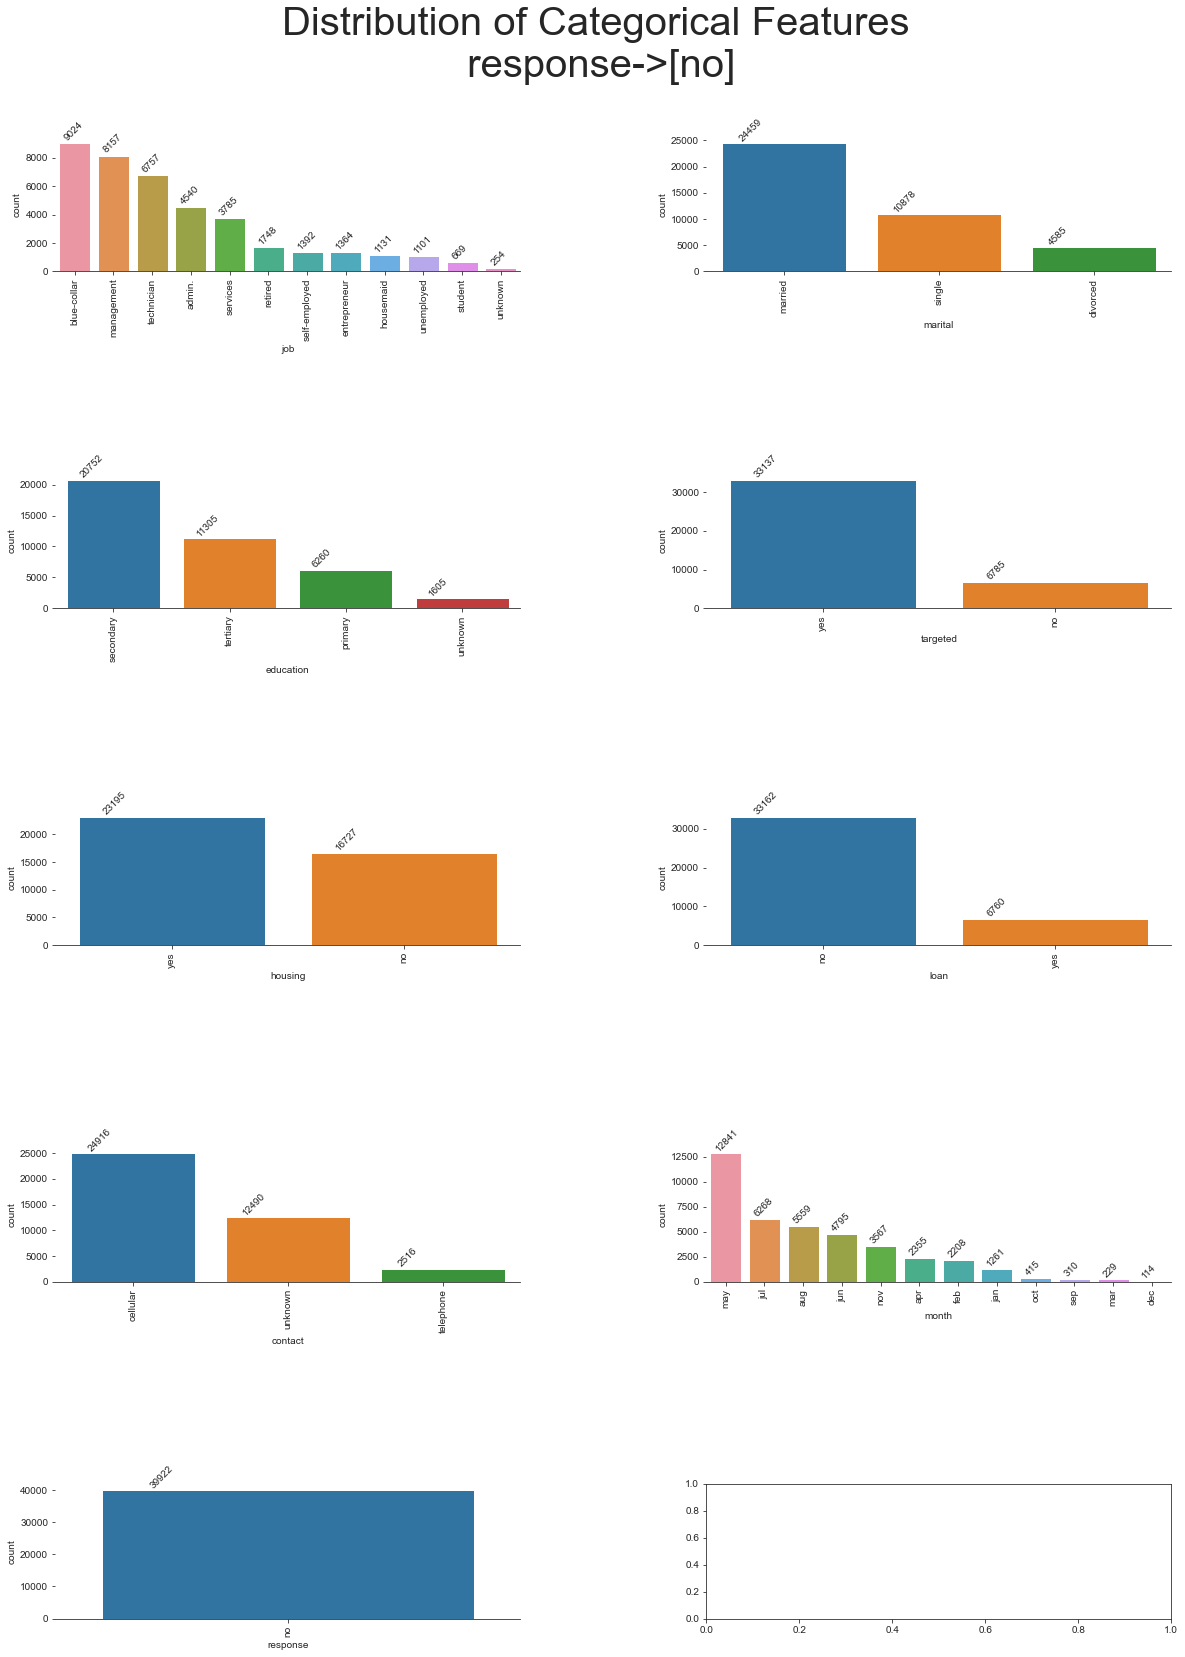

In [30]:
#plotting subplots of positive response of customers based on categorical features 
res=['yes','no']
for i in res:
    sns.set_style("ticks")
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 21))
    fig.suptitle("Distribution of Categorical Features\n response->[{}]".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, cat_var)):        
        sns.countplot(c, data=df[df['response']=='{}'.format(i)],order= df[df['response']=='{}'.format(i)][c].value_counts().index,
                  ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)

### Conclusion:
#### 1.Customers having job profile of management had more positive response toward this campaign
#### 2.Married customers have shown more interset in campaign
#### 3.Customers with secondary education looked intersted in campaign
#### 4.Targeted customers were intersted 
#### 5.Customers with no housing and personal loan were highly attracted
#### 6.Cellular communication should be the preferred mode
#### 7.Campaign has major success in month of may
# *************************************************************

In [31]:
#creating two classes based on response
df_grouped = df.groupby("response")
class_name_no = "no"
class_name_yes = "yes"
df_grouped_no = df_grouped.get_group(class_name_no)
df_grouped_yes =df_grouped.get_group(class_name_yes)

Text(0, 0.5, 'Count')

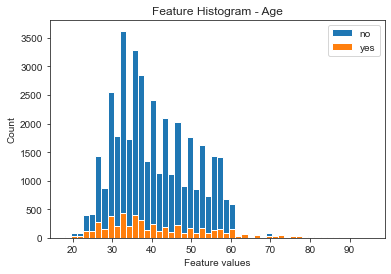

In [32]:
#plotting histogram of response based on age
plt.figure() 
plt.hist(df_grouped_no['age'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")

### Conclusion:
#### 1.Most of the customers fall in age group of 25 to 60 years 
# ************************************************************************

Text(0, 0.5, 'Count')

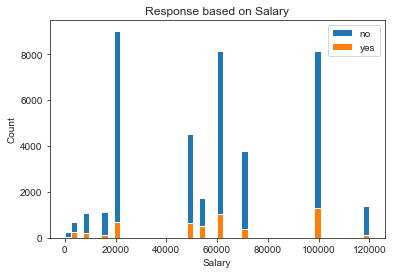

In [33]:
#plotting histogram of response based on salary
plt.figure()
plt.hist(df_grouped_no['salary'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['salary'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Response based on Salary")
plt.xlabel("Salary")
plt.ylabel("Count")

<AxesSubplot:>

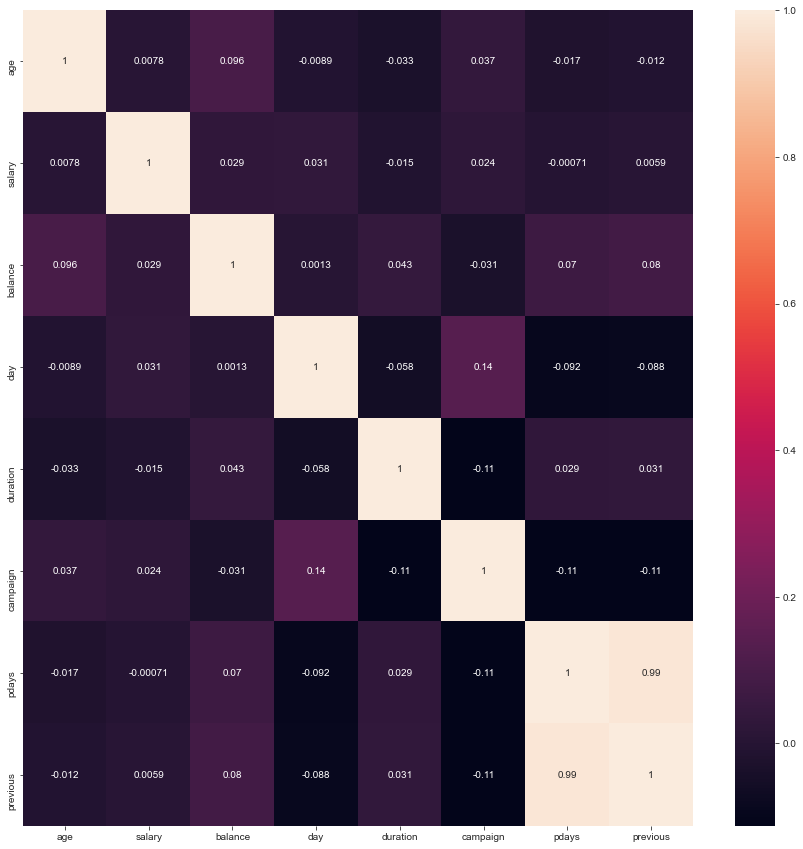

In [34]:
f, ax = plt.subplots(figsize=(15, 15))#heatmap to show correlation
sns.heatmap(df.corr(method='spearman'), annot=True)

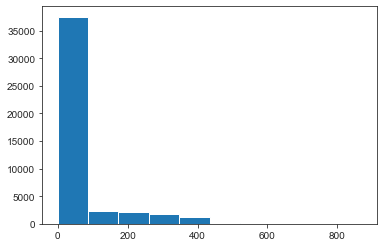

In [35]:
def histogram(df,feature):
    plt.hist(df[feature])
histogram(df,'pdays')

### Conclusion:
#### Most of the clients were contacted within the 100 days of previous contact
# ****************************************************************************

In [36]:
cat_var #categorical features 

['job',
 'marital',
 'education',
 'targeted',
 'housing',
 'loan',
 'contact',
 'month',
 'response']

In [37]:
df.response.value_counts()#count of each response

no     39922
yes     5289
Name: response, dtype: int64

### Conclusion:
#### there are good number of each target values
# ****************************************************************************

In [38]:
#converting the string tyoe output to integer type 
def conver(x):
    return x.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(conver)

In [39]:
df.response.value_counts()

0    39922
1     5289
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='count'>

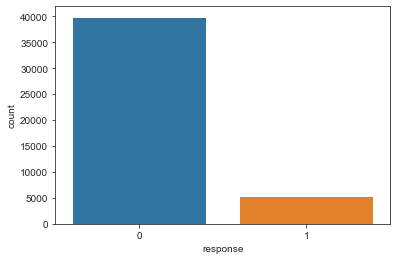

In [40]:
sns.countplot(x='response', data=df)

# *****************************************

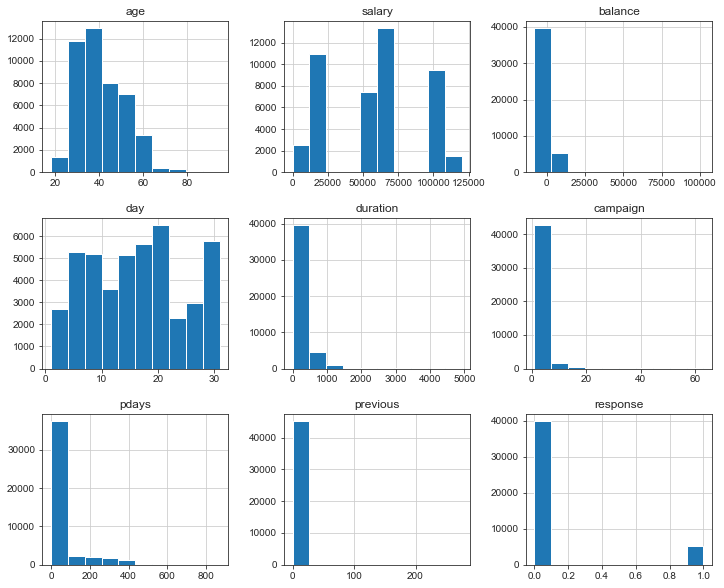

In [41]:
dist=df.hist(figsize=(12,10))#creating histogram to understand the nature of non categorical data

### Conclusion:
#### 1.Most of the customers are fall in age of range 20-60
#### 2.Most of the customers have salary:
#####    less than 25,000
#####    betwween 50,000 and 75,000
#####    more than 1,00,000

#### 3.Most of the customers have negative balance 
#### 4.Most of the customers have given about 500 sec of call time to campaign
# *********************************************************************

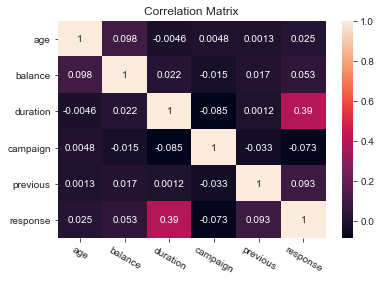

In [42]:
#Checking correlation between response and non categorical data
corr_data = df[['age','balance','duration','campaign','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True)
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

### Conclusion:
#### Duration and response are highly correlated.So bank should try to engage the customer  as long time as possible
# *****

In [43]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,yes,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,yes,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,yes,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0


# *****
### Changing the categorical string data to numeric 

In [44]:
df["targeted"]=df["targeted"].replace("yes",1)
df["targeted"]=df["targeted"].replace("no",0)

In [45]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,1,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,1,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,1,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,0


In [46]:
df["housing"]=df["housing"].replace("yes",1)
df["housing"]=df["housing"].replace("no",0)

In [47]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,1,2143,1,no,unknown,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,1,29,1,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,1,2,1,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,0,1506,1,no,unknown,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,0,1,0,no,unknown,5,may,198,1,-1,0,0


In [48]:
df["loan"]=df["loan"].replace("yes",1)
df["loan"]=df["loan"].replace("no",0)

In [49]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,0


In [50]:
df["contact"]=df["contact"].replace("unknown","other")#replacing unusual values with relevant values

In [51]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,1,2143,1,0,other,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,1,29,1,0,other,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,1,2,1,1,other,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown,0,1506,1,0,other,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown,0,1,0,0,other,5,may,198,1,-1,0,0


In [52]:
df["education"]=df["education"].replace("unknown","unknown_edu")#replacing unusual values with relevant values

In [53]:
df.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
0,58,management,100000,married,tertiary,1,2143,1,0,other,5,may,261,1,-1,0,0
1,44,technician,60000,single,secondary,1,29,1,0,other,5,may,151,1,-1,0,0
2,33,entrepreneur,120000,married,secondary,1,2,1,1,other,5,may,76,1,-1,0,0
3,47,blue-collar,20000,married,unknown_edu,0,1506,1,0,other,5,may,92,1,-1,0,0
4,33,unknown,0,single,unknown_edu,0,1,0,0,other,5,may,198,1,-1,0,0


In [54]:
df["education"].value_counts()

secondary      23202
tertiary       13301
primary         6851
unknown_edu     1857
Name: education, dtype: int64

In [55]:
lst=['job','education','marital','month','contact']#dummy encoding
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [56]:
df.head().transpose()#encoded dataframe

,0,1,2,3,4
age,58,44,33,47,33
salary,100000,60000,120000,20000,0
targeted,1,1,1,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
day,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1


In [57]:
df.shape

(45211, 41)

In [58]:
df.columns#columns formed after encoding

Index(['age', 'salary', 'targeted', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'response', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'unknown',
       'secondary', 'tertiary', 'unknown_edu', 'married', 'single', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'other', 'telephone'],
      dtype='object')

In [59]:
df.response

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response, Length: 45211, dtype: int64

## Now our datset is ready to be used in model
# *****

In [60]:
#performing model building

In [61]:
#dropping and storing target column to new variable 
X=df.drop('response', axis=1)
Y=df['response']

In [62]:
X.head()

,age,salary,targeted,balance,housing,loan,day,duration,campaign,pdays,...,jan,jul,jun,mar,may,nov,oct,sep,other,telephone
0,58,100000,1,2143,1,0,5,261,1,-1,...,0,0,0,0,1,0,0,0,1,0
1,44,60000,1,29,1,0,5,151,1,-1,...,0,0,0,0,1,0,0,0,1,0
2,33,120000,1,2,1,1,5,76,1,-1,...,0,0,0,0,1,0,0,0,1,0
3,47,20000,0,1506,1,0,5,92,1,-1,...,0,0,0,0,1,0,0,0,1,0
4,33,0,0,1,0,0,5,198,1,-1,...,0,0,0,0,1,0,0,0,1,0


In [63]:
#importing requied library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

In [65]:
Y_train

38381    0
21086    0
6268     0
29284    0
23898    0
        ..
34140    0
13927    1
919      0
38467    0
10742    0
Name: response, Length: 36168, dtype: int64

# *****
## Identifying the most important features 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
df.select_dtypes(include=[np.number])

,age,salary,targeted,balance,housing,loan,day,duration,campaign,pdays,...,jan,jul,jun,mar,may,nov,oct,sep,other,telephone
0,58,100000,1,2143,1,0,5,261,1,-1,...,0,0,0,0,1,0,0,0,1,0
1,44,60000,1,29,1,0,5,151,1,-1,...,0,0,0,0,1,0,0,0,1,0
2,33,120000,1,2,1,1,5,76,1,-1,...,0,0,0,0,1,0,0,0,1,0
3,47,20000,0,1506,1,0,5,92,1,-1,...,0,0,0,0,1,0,0,0,1,0
4,33,0,0,1,0,0,5,198,1,-1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,1,825,0,0,17,977,3,-1,...,0,0,0,0,0,1,0,0,0,0
45207,71,55000,1,1729,0,0,17,456,2,-1,...,0,0,0,0,0,1,0,0,0,0
45208,72,55000,1,5715,0,0,17,1127,5,184,...,0,0,0,0,0,1,0,0,0,0
45209,57,20000,1,668,0,0,17,508,4,-1,...,0,0,0,0,0,1,0,0,0,1


In [70]:
lm = LogisticRegression()#to be used to perform rfe

In [71]:
rfe = RFE(lm, 15)#performing rfe to obtain 15 best features
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing', 'loan', 'retired', 'student', 'aug', 'dec', 'feb', 'jan',
       'jul', 'mar', 'may', 'nov', 'oct', 'sep', 'other'],
      dtype='object')

#### These are the best 15 features for prediction
# *****

In [72]:
x_train_rfe = X_train[rfe_]

In [73]:
# funtion to perform stats model and vif
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [74]:
x_train_new = build_model(x_train_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     256.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:55:00   Log-Likelihood:                -8595.0
No. Observations:               36168   AIC:                         1.722e+04
Df Residuals:                   36152   BIC:                         1.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2380      0.005     47.409      0.0

In [75]:
x_train_rfe

,housing,loan,retired,student,aug,dec,feb,jan,jul,mar,may,nov,oct,sep,other
38381,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
21086,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6268,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
29284,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23898,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13927,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
919,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
38467,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [76]:
checkVIF(x_train_new)

,Features,VIF
0,const,9.68
11,may,2.00
5,aug,1.86
9,jul,1.84
15,other,1.58
12,nov,1.53
7,feb,1.37
1,housing,1.36
8,jan,1.20
13,oct,1.11


In [77]:
x_train_new = x_train_new.drop('const',axis=1)# remove cont dur to high vif

In [78]:
checkVIF(x_train_new)

,Features,VIF
0,housing,2.52
10,may,2.30
14,other,1.66
8,jul,1.25
1,loan,1.22
11,nov,1.14
2,retired,1.07
6,feb,1.07
4,aug,1.04
3,student,1.03


In [79]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     256.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:55:02   Log-Likelihood:                -8595.0
No. Observations:               36168   AIC:                         1.722e+04
Df Residuals:                   36152   BIC:                         1.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2380      0.005     47.409      0.0

In [80]:
x_train_new = x_train_new.drop('housing',axis=1)

In [81]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:55:02   Log-Likelihood:                -8738.7
No. Observations:               36168   AIC:                         1.751e+04
Df Residuals:                   36153   BIC:                         1.763e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2022      0.005     44.203      0.0

In [82]:
checkVIF(x_train_new)

,Features,VIF
0,const,7.97
10,may,1.85
8,jul,1.83
4,aug,1.77
14,other,1.57
11,nov,1.53
6,feb,1.37
7,jan,1.20
12,oct,1.11
13,sep,1.08


In [83]:
x_train_new = x_train_new.drop('const',axis=1)

In [84]:
checkVIF(x_train_new)

,Features,VIF
9,may,1.57
13,other,1.57
0,loan,1.21
7,jul,1.11
1,retired,1.06
2,student,1.03
10,nov,1.03
3,aug,1.02
5,feb,1.02
4,dec,1.01


In [85]:
feats=list(x_train_new.columns)

## Model Building 

### Random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier#importing library

In [87]:
#building model with all features
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
print("train and test score are")
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))
print("respectively")

train and test score are
1.0
0.9058940617051864
respectively


### Hyperparameter tuning

In [89]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 95, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [90]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [91]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [92]:
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 521.0min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 524.3min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 528.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88,
                                          89, 90, 91, 92, 93, 95]},
             verbose=2)

In [93]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 83}

In [94]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.882
Test Accuracy - : 0.888


In [ ]:
model_1 = RandomForestClassifier(n_estimators=82)
model_1.fit(X_train, Y_train)

In [ ]:
#confusion matrix when all features used
from sklearn.metrics import confusion_matrix
Y_pred1=model_1.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred1)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

In [ ]:
# building model with selected features 
model_s1 = RandomForestClassifier(n_estimators=82)
model_s1.fit(X_train[feats], Y_train)

In [ ]:
#confusion matrix when selected features used
Y_pred1_=model_s1.predict(X_test[feats])
conf_mat=confusion_matrix(Y_test,Y_pred1_)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

In [ ]:
print('For all features')
print(accuracy_score(Y_test, Y_pred1))
print("_________________________________________________________________________________________________")
print('For selected features')
print(accuracy_score(Y_test, Y_pred1_))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))

### This is the classification report when all features used
# *****

In [ ]:
print(classification_report(Y_test, Y_pred1_))

### This is the classification report when se features used
# *****

In [ ]:
print("______________________________________________________________________________________________________________________")

### Logistic regression

In [ ]:
#building model with all features
model_2 = LogisticRegression()
model_2.fit(X_train, Y_train)

In [ ]:
print("train and test score are")
print(model_2.score(X_train, Y_train))
print(model_2.score(X_test, Y_test))
print("respectively")

In [ ]:
#confusion matrix when all features used
from sklearn.metrics import confusion_matrix
Y_pred2=model_2.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred2)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

In [ ]:
# building model with selected features 
model_s2 = LogisticRegression()
model_s2.fit(X_train[feats], Y_train)

In [ ]:
#confusion matrix when selected features used
Y_pred2_=model_s2.predict(X_test[feats])
conf_mat=confusion_matrix(Y_test,Y_pred2_)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

In [ ]:
print(classification_report(Y_test, Y_pred2))

In [ ]:
print(classification_report(Y_test, Y_pred2_))

In [ ]:
print('For all features')
print(accuracy_score(Y_test, Y_pred2))
print("_________________________________________________________________________________________________")
print('For selected features')
print(accuracy_score(Y_test, Y_pred2_))

In [ ]:
print("________________________________________________________________________________________________________________________")

### K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
k_lr = LogisticRegression()
kfold = KFold(n_splits=10, random_state=7)
s_lr=cross_val_score(k_lr, X, Y, cv=kfold, scoring ='accuracy')
print(s_lr)

In [ ]:
k_rfc = RandomForestClassifier(n_estimators=84,bootstrap= True, max_depth=4,max_features= 'sqrt', min_samples_leaf= 2,min_samples_split= 2)
kfold = KFold(n_splits=10, random_state=7)
s_rfc=cross_val_score(k_rfc, X, Y, cv=kfold, scoring ='accuracy')
print(s_rfc)

In [ ]:
fold = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10']

In [ ]:
dfs = pd.DataFrame(data={'Folds':fold , 'Logistic reg': s_lr, 'Rand. forest': s_rfc})

In [ ]:
dfs.head(10)

##### The above dataframe shows the Accuracy score of logistic regression and random forest classifier
##### __

In [ ]:
dfs.plot(x="Folds", y=["Logistic reg", "Rand. forest"], kind="bar",figsize=(10,5),title="Fold wise accuracy score of Logistic Regression and Random Forest Classifier")

In [ ]:
dfs.plot(x="Folds", y=["Logistic reg", "Rand. forest"], kind="box",figsize=(10,5))

In [ ]:
sm_lr=s_lr.mean()
sm_rfc=s_rfc.mean()

In [ ]:
print("Average accuracy score of logistic regression after k fold cross validation is")
print(sm_lr)
print("______________________________________________________________________________")
print("Average accuracy score of Random forest classifier after k fold cross validation is")
print(sm_rfc)

#### The average accuracy of logistic regression is slightly better than Random forest 
# ---------------------------------------------------

In [ ]:
#listing the most important fatures to be considered in campaign
rfe=list(x_train_new)
print('The most important features that decide response of the customer are\n',rfe)

In [ ]:
df_test=pd.DataFrame(data={'age':[58],'job':['management'],'salary':[100000],'marital':['married'],'education':['tertiary'],'targeted':['yes'], 'default':['no'],'balance':[2145],'housing':['yes'],'loan':['no'],'contact':['cellular'],'day':[5],'month':['may'],'duration':[261],'campaign':[1],'pdays':[-1],'previous':[0],'poutcome':['unknown']})

In [ ]:
df_test.head()

In [ ]:
df_test=df_test.drop(["poutcome"],axis=1)

In [ ]:
df_test.head()

In [ ]:
df_test=df_test.drop(["default"],axis=1)

In [ ]:
df_test.head()

In [ ]:
df_test1=pd.DataFrame(data={'loan':[0,0], 'retired':[1,0], 'student':[0,1], 'aug':[1,0], 'dec':[0,0], 'feb':[0,1], 'jan':[0,0], 'jul':[0,0], 'mar':[1,0], 'may':[1,0], 'nov':[1,0], 'oct':[1,0], 'sep':[1,0], 'other':[1,1]})

In [ ]:
df_test1.head()

In [ ]:
Y_pred2_=model_s2.predict(df_test1)

In [ ]:
Y_pred2_